# JAMES CLERK HAXWELL 

First, we tried a naive random forest, without any data cleaning, aside from filling NaNs with the mean value of the column. 

In [2]:
import numpy as np
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from me388 import QuantumBlackPCA
from feature_scaling import scale_features
from sklearn.model_selection import train_test_split
from bayes import bayes_output
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [13]:
data = pd.DataFrame.from_csv('../DataFiles/train.csv')
data = data.fillna(data.mean())
cols = [col for col in data.columns if col != 'class'] 
features = data[cols]
bankrupt = data['class']
feature_train, feature_test, class_train, class_test = train_test_split(
    features, bankrupt, test_size=0.2, random_state=1)

forest = RandomForestClassifier(n_estimators=100, n_jobs=6)
forest = forest.fit(feature_train, class_train)
output = forest.predict(feature_test)
score = forest.score(feature_test, class_test)

bayes_output(output, score, class_test)

sum:  6946
true positives:  107
true negatives:  6605
false positives:  16
false negatives:  218
ratio pos/neg:  0.07339449541284404
test ratio pos/neg:  0.0490862407491
bs score 0.966311546214


Although we immediately obtain a 95% success rate in prediction, our Bayesian probability of correctly predicted a bankruptcy is still quite low! Given the imbalance between bankruptcy and survival, we can tune the class weights of our random forest for a slight improvement.

In [14]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=6, class_weight={0:0.9, 1:0.1})
forest = forest.fit(feature_train, class_train)
output = forest.predict(feature_test)
score = forest.score(feature_test, class_test)

bayes_output(output, score, class_test)

sum:  6946
true positives:  117
true negatives:  6589
false positives:  32
false negatives:  208
ratio pos/neg:  0.15384615384615385
test ratio pos/neg:  0.0490862407491
bs score 0.965447739706


If we now include the "NaN-ness" of a column as a new feature , we can improve this score.

In [15]:
data = pd.DataFrame.from_csv('../DataFiles/train_withNaNinfo.csv')
data = data.fillna(data.mean())
cols = [col for col in data.columns if col != 'class'] 
features = data[cols]
bankrupt = data['class']
feature_train, feature_test, class_train, class_test = train_test_split(
    features, bankrupt, test_size=0.2, random_state=1)

forest = RandomForestClassifier(n_estimators=100, n_jobs=6, class_weight={0: 0.9, 1: 0.1})
forest = forest.fit(feature_train, class_train)
output = forest.predict(feature_test)
score = forest.score(feature_test, class_test)

bayes_output(output, score, class_test)

sum:  6946
true positives:  118
true negatives:  6593
false positives:  28
false negatives:  207
ratio pos/neg:  0.13526570048309178
test ratio pos/neg:  0.0490862407491
bs score 0.966167578462


In [17]:
data = pd.DataFrame.from_csv('../DataFiles/train_withNaN27.csv')
data = data.fillna(data.mean())
cols = [col for col in data.columns if col != 'class'] 
features = data[cols]
bankrupt = data['class']
feature_train, feature_test, class_train, class_test = train_test_split(
    features, bankrupt, test_size=0.2, random_state=1)

forest = RandomForestClassifier(n_estimators=100, n_jobs=6, class_weight={0: 0.9, 1: 0.1})
forest = forest.fit(feature_train, class_train)
output = forest.predict(feature_test)
score = forest.score(feature_test, class_test)

bayes_output(output, score, class_test)

sum:  6946
true positives:  120
true negatives:  6589
false positives:  32
false negatives:  205
ratio pos/neg:  0.15609756097560976
test ratio pos/neg:  0.0490862407491
bs score 0.96587964296


This only slightly improves our results... At this stage we did some PCA and pair correlation to try to reduce our dimensionality, making our answers more interpretable with (hopefully) no loss of accuracy.

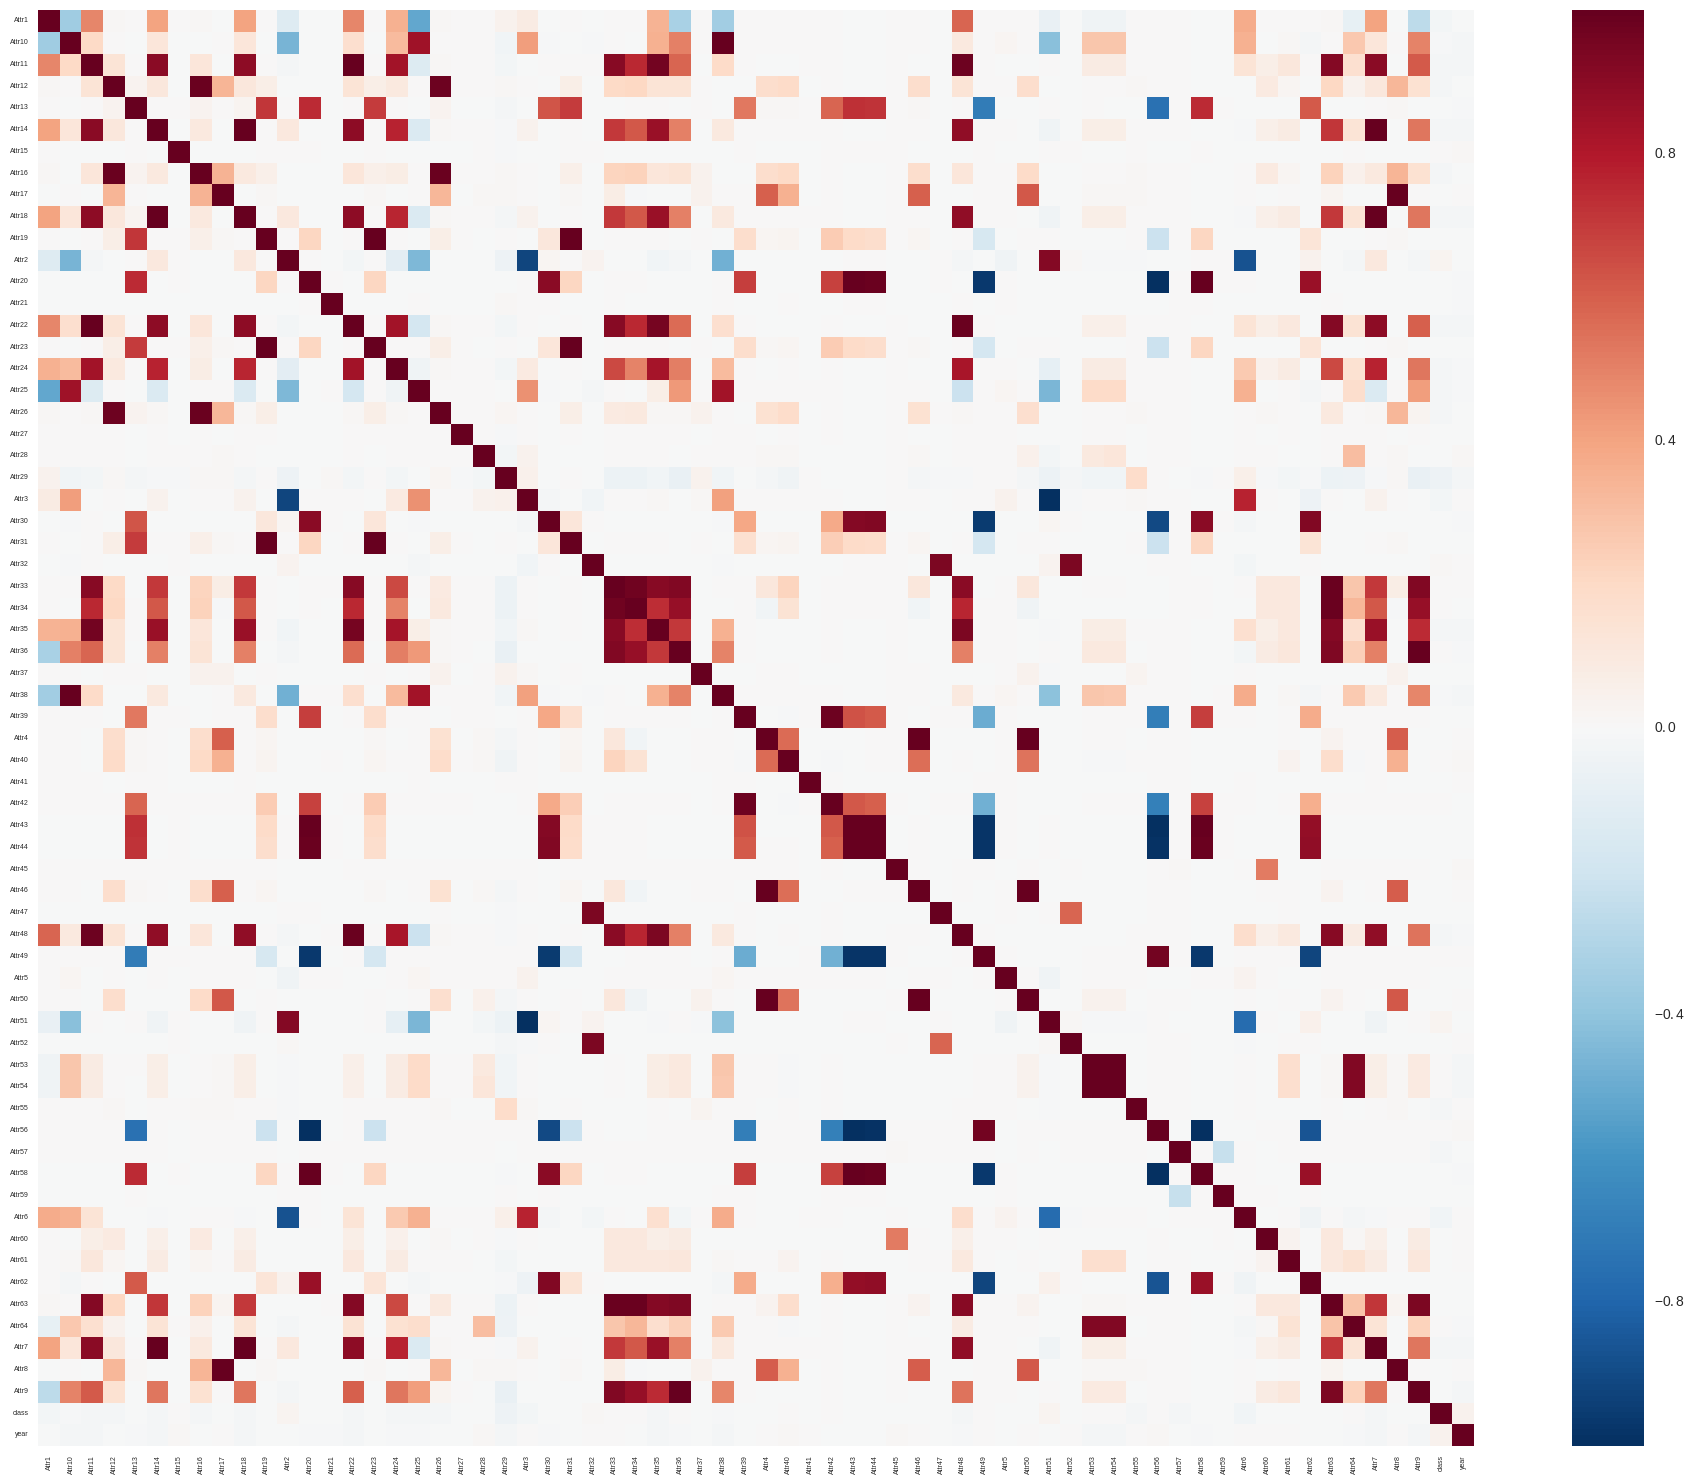

In [27]:
from pandas_corr import corr_plot
corr_plot()

Clearly we have several closely correlated columns, so we should be able to easily reduce the dimensionality. To this end, we did some PCA, which itself required feature scaling.

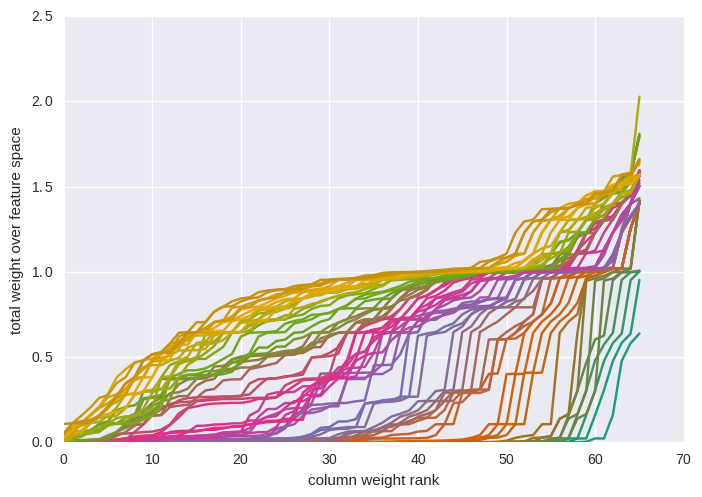

In [5]:
data = pd.DataFrame.from_csv('../DataFiles/train.csv')
data = data.fillna(data.mean())
pca = QuantumBlackPCA(data,
                      n_components=range(1, len(data.columns), 1))
pca.plot_column_weights()

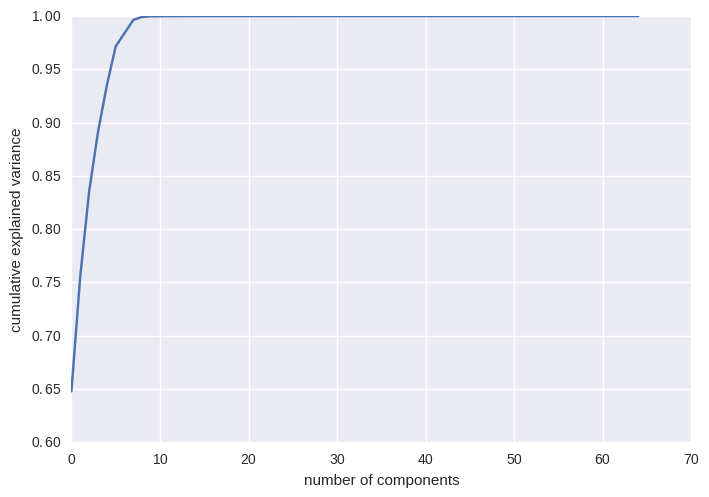

In [6]:
pca.plot_pca_explained_variance()

i.e. we can reduce our dimensions to around 15!

How about a different classifier algorithm? Gradient Boosted Trees include only shallower decision trees (stumps!) and thus increases the bias whilst decreasing the variance. Back on the original data...

In [20]:
data = pd.DataFrame.from_csv('../DataFiles/train.csv')
data = data.fillna(data.mean())
cols = [col for col in data.columns if col != 'class'] 
features = data[cols]
bankrupt = data['class']
feature_train, feature_test, class_train, class_test = train_test_split(
    features, bankrupt, test_size=0.2, random_state=1)

forest = GradientBoostingClassifier(n_estimators=100)
forest = forest.fit(feature_train, class_train)
output = forest.predict(feature_test)
score = forest.score(feature_test, class_test)

bayes_output(output, score, class_test)

sum:  6946
true positives:  141
true negatives:  6604
false positives:  17
false negatives:  184
ratio pos/neg:  0.09239130434782608
test ratio pos/neg:  0.0490862407491
bs score 0.971062482004


And on the NaN'd dataset...

In [21]:
data = pd.DataFrame.from_csv('../DataFiles/train_withNaN27.csv')
data = data.fillna(data.mean())
cols = [col for col in data.columns if col != 'class'] 
features = data[cols]
bankrupt = data['class']
feature_train, feature_test, class_train, class_test = train_test_split(
    features, bankrupt, test_size=0.2, random_state=1)

forest = GradientBoostingClassifier(n_estimators=100)
forest = forest.fit(feature_train, class_train)
output = forest.predict(feature_test)
score = forest.score(feature_test, class_test)

bayes_output(output, score, class_test)

sum:  6946
true positives:  145
true negatives:  6606
false positives:  15
false negatives:  180
ratio pos/neg:  0.08333333333333333
test ratio pos/neg:  0.0490862407491
bs score 0.971926288511


If we increase the learning rate and number of estimators:

In [22]:
data = pd.DataFrame.from_csv('../DataFiles/train_withNaN27.csv')
data = data.fillna(data.mean())
cols = [col for col in data.columns if col != 'class'] 
features = data[cols]
bankrupt = data['class']
feature_train, feature_test, class_train, class_test = train_test_split(
    features, bankrupt, test_size=0.2, random_state=1)

forest = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5)
forest = forest.fit(feature_train, class_train)
output = forest.predict(feature_test)
score = forest.score(feature_test, class_test)

bayes_output(output, score, class_test)

sum:  6946
true positives:  193
true negatives:  6554
false positives:  67
false negatives:  132
ratio pos/neg:  0.5075757575757576
test ratio pos/neg:  0.0490862407491
bs score 0.971350417506


Our two most important features are predicted to be:

```365 * cash +  securities + receivables - short-term liabilities / operating expenses - deprecation ```

and 

``` total costs / total_sales ```

We also did community detection using infomap based on the Euclidean distance between the 25 components projected by PCA. These can be found in the clustering.

Finally, we checked how our model works with time:

sum:  6946
true positives:  185
true negatives:  6548
false positives:  73
false negatives:  140
ratio pos/neg:  0.5214285714285715
test ratio pos/neg:  0.0490862407491
bs score 0.969334868989


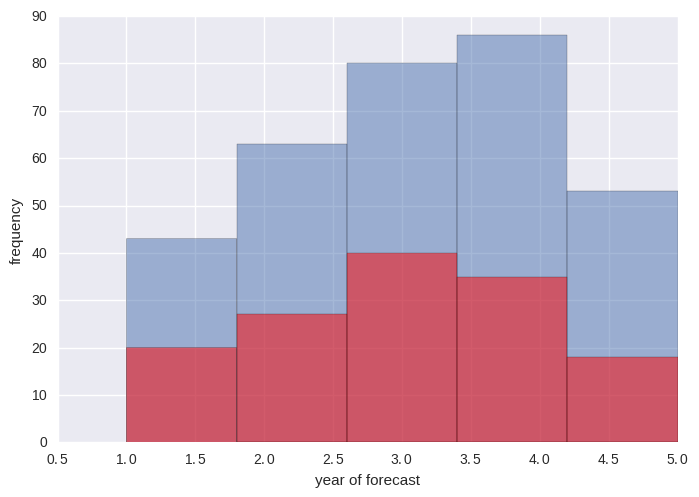

In [18]:
data = pd.DataFrame.from_csv('../DataFiles/train_withNaNinfo.csv')
data = data.fillna(data.mean())
cols = [col for col in data.columns if col != 'class'] 
features = data[cols]
bankrupt = data['class']
feature_train, feature_test, class_train, class_test = train_test_split(
    features, bankrupt, test_size=0.2, random_state=1)

forest = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5, loss='deviance')

forest = forest.fit(feature_train, class_train)
output = forest.predict(feature_test)
score = forest.score(feature_test, class_test)

bayes_output(output, score, class_test)

true_positives = np.where(np.logical_and(class_test, output))
false_negatives = np.where(class_test > output)
positives = np.where(class_test)


pos_years = [feature_test["year"].iloc[pos] for pos in positives]

false_neg_years = [feature_test["year"].iloc[pos] for pos in false_negatives]
true_pos_years = [feature_test["year"].iloc[pos] for pos in true_positives]

plt.hist(pos_years, bins=5, alpha=0.5)
#plt.hist(true_pos_years, bins=5, alpha=0.5, color='g')
plt.hist(false_neg_years, bins=5, alpha=0.5, color='r')
plt.xlabel('year of forecast')
plt.ylabel('frequency')

In [20]:
true_positives = 185
false_negatives = 140
false_positives = 73

In [22]:
fscore = 2*true_positives/(2*true_positives + false_negatives + false_positives) 

In [21]:
fscore

0.6346483704974271